<a href="https://colab.research.google.com/github/hamza7771/Self_made_learning_projects/blob/main/Iris_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris.csv
User uploaded file "Iris.csv" with length 5107 bytes


In [ ]:

import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

A 50
B 50
C 50


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


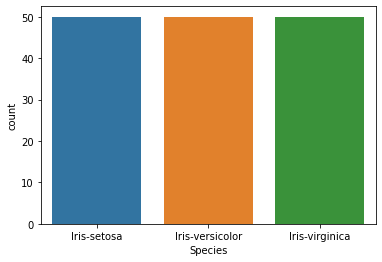

In [ ]:
import seaborn as sns
ax = sns.countplot(data['Species'], label= 'Count')
A,B,C = data['Species'].value_counts()
print('A', A)
print('B', B)
print('C', C)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing data
del data['Id']

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values


In [ ]:

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y1 = labelencoder_X_1.fit_transform(y)
y2=pd.get_dummies(y1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y2, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
Y_train


,0,1,2
137,0,0,1
84,0,1,0
27,1,0,0
127,0,0,1
132,0,0,1
...,...,...,...
9,1,0,0
103,0,0,1
67,0,1,0
117,0,0,1


In [ ]:
X_test[0]

array([-0.09544771, -0.58900572,  0.72247648,  1.51195265])

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train.shape

(120, 4)

In [ ]:
from keras.layers import Dropout
#adding the input and first hidden layer
model = Sequential()

model.add(Dense(4, activation='relu',input_shape=(4,)))
#classifier.add(Dropout(p=1.0))

#adding the second hidden layer
#classifier.add(Dense(4, activation='relu'))
#classifier.add(Dropout(p=1.0))

#adding the output layer
model.add(Dense(3, activation='softmax'))

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, batch_size=1, epochs=50)

Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9667
Epoch 2/50
120/120 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9667
Epoch 3/50
120/120 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.9750
Epoch 4/50
120/120 [==============================] - 0s 3ms/step - loss: 0.1061 - accuracy: 0.9667
Epoch 5/50
120/120 [==============================] - 0s 3ms/step - loss: 0.1037 - accuracy: 0.9750
Epoch 6/50
120/120 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9750
Epoch 7/50
120/120 [==============================] - 0s 2ms/step - loss: 0.0987 - accuracy: 0.9750
Epoch 8/50
120/120 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9750
Epoch 9/50
120/120 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.9667
Epoch 10/50
120/120 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9750

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1.3290235e-05, 1.1457720e-02, 9.8852903e-01],
       [4.0458716e-04, 9.9341398e-01, 6.1815237e-03],
       [9.9726969e-01, 2.7131436e-03, 1.7144062e-05],
       [2.8817329e-05, 7.3904455e-02, 9.2606676e-01],
       [9.9895191e-01, 1.0446559e-03, 3.4019324e-06],
       [8.1689599e-05, 4.9236217e-03, 9.9499464e-01],
       [9.9846834e-01, 1.5248144e-03, 6.7740998e-06],
       [8.4404903e-04, 6.2662345e-01, 3.7253252e-01],
       [1.4148458e-04, 6.6470909e-01, 3.3514941e-01],
       [1.1901021e-03, 9.3387741e-01, 6.4932466e-02],
       [4.2967382e-04, 6.0879540e-01, 3.9077491e-01],
       [2.6354461e-03, 7.0994133e-01, 2.8742322e-01],
       [3.2058565e-03, 9.4576210e-01, 5.1032070e-02],
       [1.8664042e-04, 6.0110331e-01, 3.9871004e-01],
       [1.4613908e-03, 7.8062212e-01, 2.1791655e-01],
       [9.9910092e-01, 8.9752435e-04, 1.5100135e-06],
       [1.1058116e-03, 6.9656950e-01, 3.0232471e-01],
       [5.7611405e-03, 9.6910399e-01, 2.5134781e-02],
       [9.9712050e-01, 2.872

In [ ]:
y_pred=model.predict(X_test)

y_pred.shape

(30, 3)

In [ ]:
Y_test

In [ ]:

y_pred = model.predict(X_test)
y_test_class = np.argmax(Y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

ValueError: ignored

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)
y_pred = (y_pred)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True)
plt.savefig('h.png')


ValueError: ignored

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

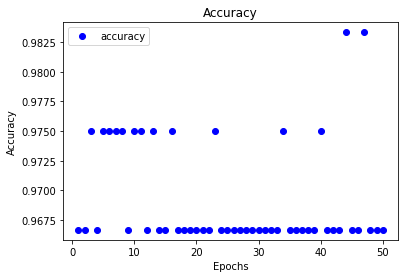

In [ ]:

import matplotlib.pyplot as plt
history_dict = history.history
accuracy = history_dict["accuracy"]
#val_loss_values = history_dict["accuracy"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="accuracy")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-pack

In [ ]:
accuracies

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
accuracies.mean()

nan

In [ ]:
accuracies.std()

nan

In [ ]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 500],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrap

TypeError: ignored